In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import talib as ta

In [10]:
ADA_BTC = pd.read_json("data/ADA_BTC-5m.json")
ADA_BTC.columns = ["time_stamp","high", "low","open","close","volume"]

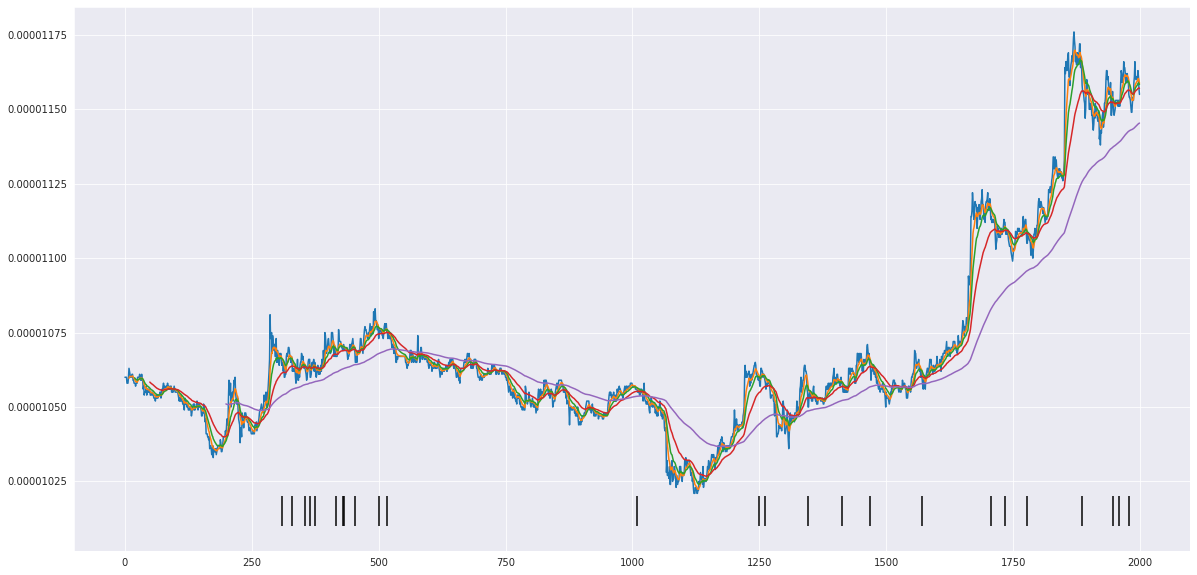

In [97]:
ADA_BTC["returns"] = ADA_BTC.close/ADA_BTC.close.shift(-1)
ADA_BTC['ema9'] = ta.EMA(ADA_BTC.close, timeperiod=9)
ADA_BTC['ema20'] = ta.EMA(ADA_BTC.close, timeperiod=20)
ADA_BTC['ema50'] = ta.EMA(ADA_BTC.close, timeperiod=50)
ADA_BTC['ema200'] = ta.EMA(ADA_BTC.close, timeperiod=200)

ADA_BTC["Buy"] = 0

ADA_BTC.loc[(ADA_BTC["ema9"] > ADA_BTC["ema20"])&
       (ADA_BTC["ema20"] > ADA_BTC["ema50"])&
       (ADA_BTC["ema50"] > ADA_BTC["ema200"]),"Buy"] = 1


ADA_BTC["Buy_signal"] = ADA_BTC["Buy"]- ADA_BTC["Buy"].shift(-1)

y = np.argwhere(ADA_BTC["Buy_signal"][:2000] == 1)

plt.figure(figsize=(20,10))
plt.plot(ADA_BTC.close[:2000])
plt.plot(ADA_BTC['ema9'][:2000])
plt.plot(ADA_BTC['ema20'][:2000])
plt.plot(ADA_BTC['ema50'][:2000])
plt.plot(ADA_BTC['ema200'][:2000])
plt.vlines(y,0.0000101,0.0000102)

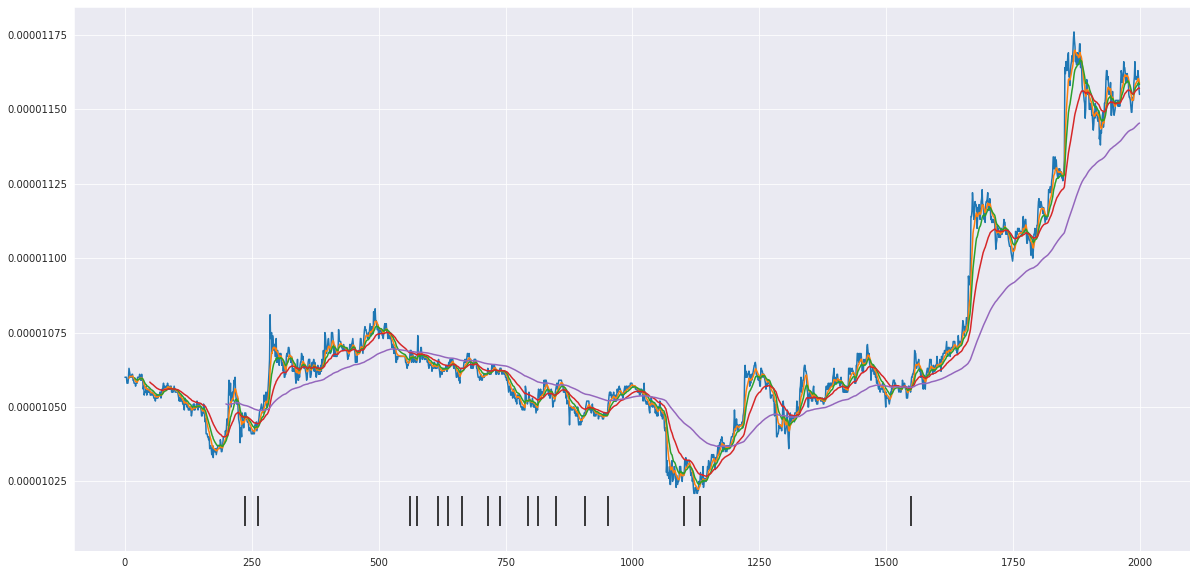

In [91]:
y = np.argwhere(ADA_BTC["Buy_signal"][:2000] == 1)
# plt.vlines(y,0.000101,0.000102)

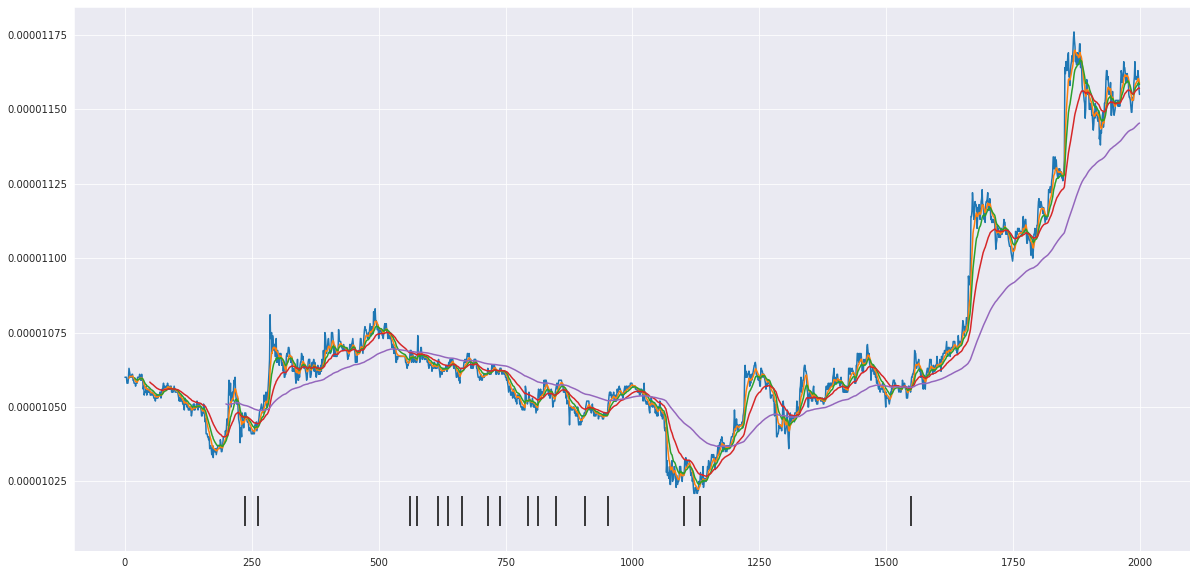

In [86]:
plt.figure(figsize=(20,10))
plt.plot(ADA_BTC.close[:2000])
plt.plot(ADA_BTC['ema9'][:2000])
plt.plot(ADA_BTC['ema20'][:2000])
plt.plot(ADA_BTC['ema50'][:2000])
plt.plot(ADA_BTC['ema200'][:2000])
plt.vlines(y,0.0000101,0.0000102)